 # **Regresión Lineal Simple**

En este notebook se aplica un modelo de **Regresión Lineal Simple** utilizando el dataset [Global Air Pollution][kaggle] de Kaggle.

[kaggle]: https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset


#### **Objetivo del Notebook**
Investigar la relación entre las concentraciones de **Ozone AQI Value** y **PM2.5 AQI Value** a través de la aplicación de una modelo de regresión lineal. A lo largo del análisis, se realiza el ajuste del modelo, el cálculo de los coeficientes de la recta y la evaluación de la calidad del ajuste mediante métricas como el **Error Cuadrático Medio (MSE)** y el **Coeficiente de Determinación (R²)**. 

#### **Explicación del modelo de regresión lineal simple**

La regresión lineal simple es un método estadístico que se utiliza para modelar la relación entre dos variables: una variable independiente (predictora) y una variable dependiente (respuesta). El objetivo es encontrar la línea que mejor se ajuste a los datos, minimizando la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo.

Ecuación de la regresión lineal simple
La ecuación de la regresión lineal simple se expresa como:

**y = mx + b**

donde:

**y** es la variable dependiente.  
**x** es la variable independiente.  
**m** es la pendiente de la línea (cambio en y por cada unidad de cambio en x).  
**b** es la intersección con el eje y (valor de y cuando x=0).  

### Importar librerías 

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import numpy as np

### Importar Dataset Limpio

In [66]:
df = pd.read_csv("../data/dataset_clean.csv")

### Selección de las columnas para X (Independiente) e Y (Dependiente)

In [67]:
X = df['Ozone AQI Value'] # Variable independiente
Y = df['PM2.5 AQI Value'] # Variable dependiente

### Análisis de distribución de las variables

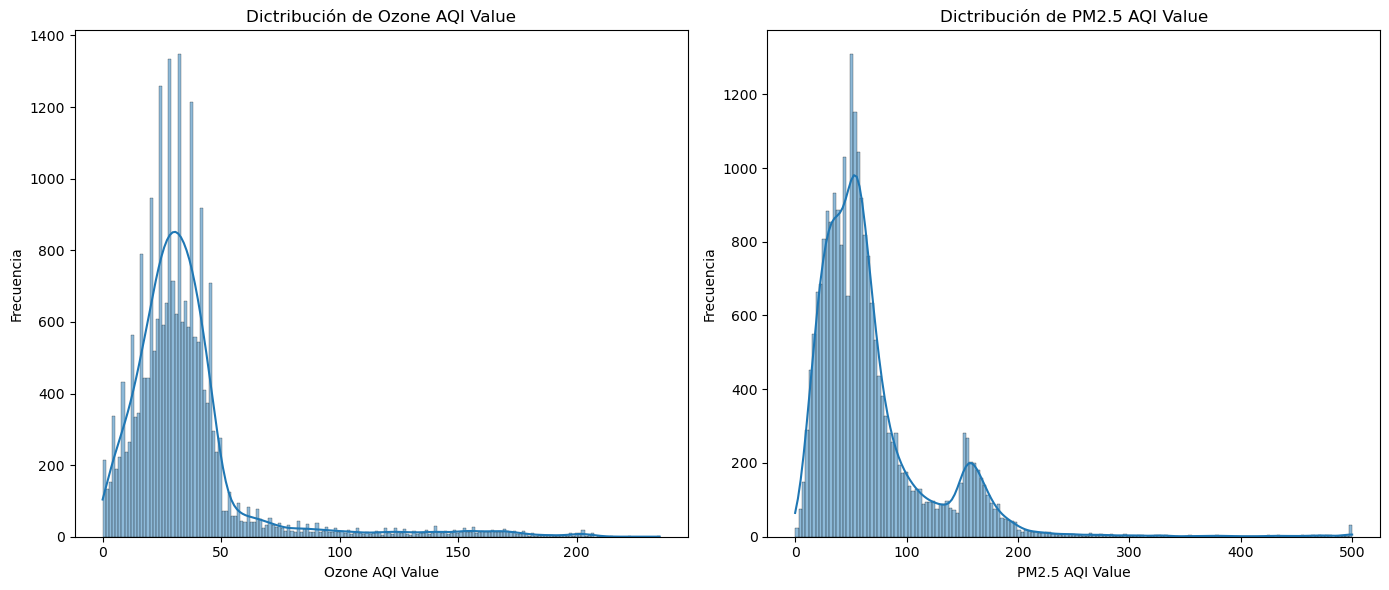

In [10]:
plt.figure(figsize=(14,6))

# Distribución de la variable X (Ozone AQI Value)
plt.subplot(1, 2, 1)
sns.histplot(X, kde=True)
plt.title('Dictribución de Ozone AQI Value')
plt.xlabel('Ozone AQI Value')
plt.ylabel('Frecuencia')

# Distribución de la variable Y (PM2.5 AQI Value)
plt.subplot(1, 2, 2)
sns.histplot(Y, kde=True)
plt.title('Dictribución de PM2.5 AQI Value')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Gráfico de dispersión entre Ozone AQI y PM2.5 AQI

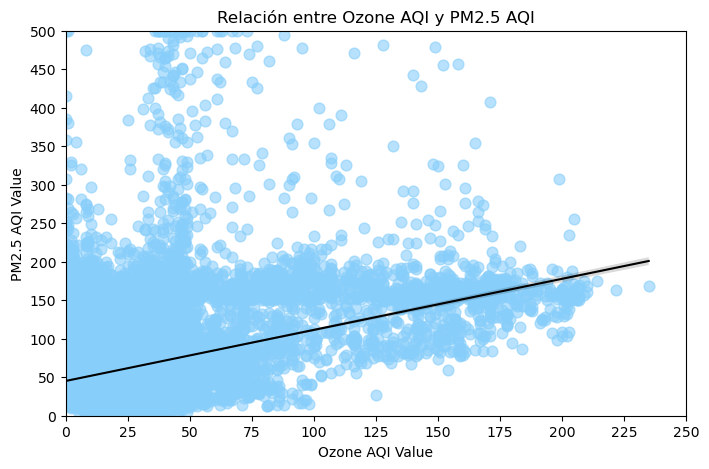

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot(
    x= X,
    y= Y,
   scatter_kws= {
       'alpha': 0.6,
       's': 60, # Tamaño de los puntos
       'color': 'lightskyblue'
   },
   line_kws= {'color': 'black', 'lw': 1.5} # Línea de tendencia
)

# Modificar los intervalos en el eje X y Y
plt.xticks(np.arange(0, 275, 25))  # Valores de 25 en 25 en el eje X
plt.yticks(np.arange(0, 550, 50))  # Valores de 25 en 25 en el eje Y

plt.xlim(0, 250)  # Límite del eje X de 0 a 500
plt.ylim(0, 500)  # Límite del eje Y de 0 a 300

plt.title('Relación entre Ozone AQI y PM2.5 AQI')
plt.xlabel('Ozone AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.show()

### Cálculos Explicitos

#### Calcular las medias de X (Ozone AQI) e Y (PM2.5 AQI)

In [18]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)
print(f"Media de X (Ozone AQI): {mean_X:.2f}")
print(f"Media de Y (PM2.5 AQI): {mean_Y:.2f}")

Media de X (Ozone AQI): 35.19
Media de Y (PM2.5 AQI): 68.52


#### Calcular la covarianza entre X e Y

In [ ]:
cov_XY = np.cov(X, Y)[0, 1]
print(f"Covarianza entre X e Y: {cov_XY:.2f}")

Covarianza entre X e Y:  523.33


#### Calcular de la varianza de X

In [21]:
var_X = np.var(X, ddof=1)
print(f"Varianza de X: {var_X:.2f}")

Varianza de X: 789.54


#### Calcular de los coeficientes de la recta (pendiente β₁ y la intersección β₀)

In [22]:
pendiente_manual = cov_XY / var_X
interseccion_manual = mean_Y - pendiente_manual * mean_X

print(f"Pendiente calculada manualmente (β₁): {pendiente_manual:.2f}")
print(f"Intersección calculada manualmente (β₀): {interseccion_manual:.2f}")

Pendiente calculada manualmente (β₁): 0.66
Intersección calculada manualmente (β₀): 45.19


#### Ecuación de la recta

In [27]:
print(f"Ecuación de la recta: Y = {interseccion_manual:.2f} + {pendiente_manual:.2f} X")

Ecuación de la recta: Y = 45.19 + 0.66 X


### Regresión lineal, utilizando la librería scikit learn 
En este análisis, se emplea la librería Scikit-Learn para construir un modelo de regresión lineal. El objetivo es generar predicciones y comparar los resultados obtenidos, evaluando la precisión y el ajuste del modelo a los datos disponibles.

La implementación permitirá analizar la relación entre las variables, obtener coeficientes de regresión, calcular métricas de desempeño como el R² y el Error Cuadrático Medio (MSE), y visualizar la tendencia de los datos mediante gráficos.

In [71]:
# Creación de los conjuntos de entrenamiento y prueba
X_reshape = X.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_reshape, Y, test_size=0.20, random_state=42)

# Crear el model de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Mostrar coeficientes
pendiente = model.coef_[0]
interseccion = model.intercept_
r_square = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Coeficiente (Pendiente): {pendiente:.3f}")
print(f"Intersección con el eje Y: {interseccion:.3f}")
print(f"Error cuadrático medio: {mse:.3f}")
print(f'R2 Score: {r2:.3f}')

print(f"Ecuación de la recta: Y = {interseccion:.2f} + {pendiente:.2f} X")

Coeficiente (Pendiente): 0.655
Intersección con el eje Y: 45.622
Error cuadrático medio: 2658.625
R2 Score: 0.944
Ecuación de la recta: Y = 45.62 + 0.65 X


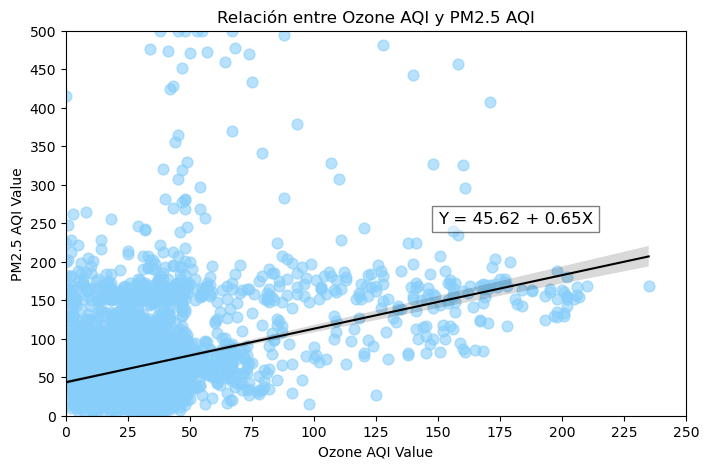

In [82]:
# Graficar los resultados
plt.figure(figsize=(8,5))
sns.regplot(
    x= X_test.flatten(),
    y= y_test,
   scatter_kws= {
       'alpha': 0.6,
       's': 60, # Tamaño de los puntos
       'color': 'lightskyblue'
   },
   line_kws= {'color': 'black', 'lw': 1.5} # Línea de tendencia
)


# Mostrar la ecuación en el gráfico
ecuacion = f"Y = {interseccion:.2f} + {pendiente:.2f}X"
plt.text(X_test.min()+150, y_test.max()/2, ecuacion, fontsize=12, color="black", bbox=dict(facecolor="white", alpha=0.5))

# Modificar los intervalos en el eje X y Y
plt.xticks(np.arange(0, 275, 25))  # Valores de 25 en 25 en el eje X
plt.yticks(np.arange(0, 550, 50))  # Valores de 25 en 25 en el eje Y

plt.xlim(0, 250)  # Límite del eje X de 0 a 500
plt.ylim(0, 500)  # Límite del eje Y de 0 a 300

plt.title('Relación entre Ozone AQI y PM2.5 AQI')
plt.xlabel('Ozone AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.show()